# Bike Sharing Demand Case Study

## Multiple Linear Regression

## Problem Statement
>A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 
>
>In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.
>
>Company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
> 1. Which variables are significant in predicting the demand for shared bikes.
> 2. How well those variables describe the bike demands
>
>Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

## Bussiness Goal
>Build a model to predict the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.
>1. **Inventory Management**: The company can use this information to adjust its bike inventory based on the expected demand during different periods.
>2. **Marketing Strategies**: Targeted marketing campaigns can be launched to boost rentals during periods of lower demand.
>3. **Operational Planning**: Staffing and maintenance schedules can be optimized based on the anticipated rental volumes.

## Approach
Company is concerned and wants to understand the factors affecting the demand for shared bikes. This is a regression problem, since we are trying to predict a continuous value (the number of bike rentals).

Here are some of the things that we will do to address the problem:

**Data Preparation**:
1. Convert the `weathersit` and `season` variables to categorical string values.
2. Will keep the `yr` column as it is. Model Building:
3. Will use the `cnt` variable as the target variable.
4. Will build a linear regression model to predict the demand for shared bikes. Model Evaluation:
5. Will calculate the `R-squared` score on the test set to evaluate the model's performance.

## DataSet Understanding
1. **Index Variable**
    - **instant**: record index
2. **Date & Time Variables**
    - **dteday** : date
    - **yr** : year (0: 2018, 1:2019)
    - **mnth** : month ( 1 to 12)
    - **weekday** : day of the week
4. **Day-Related Variables**
    - **holiday** : weather day is a holiday or not
    - **workingday** : if day is neither weekend nor holiday is 1, otherwise is 0.
5. **season** : season (1:spring, 2:summer, 3:fall, 4:winter)
6. **weathersit** : 
     - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	 - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	 - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	 - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
7. **Environmental Variables**
     - **temp** : temperature in Celsius
     - **atemp** : feeling temperature in Celsius
     - **hum** : humidity
     - **windspeed** : wind speed
8. **User Variables**
     - **casual** : count of casual users
     - **registered** : count of registered users
     - **cnt** : count of total rental bikes including both casual and registered

# Step-1: Reading and Understanding the Data

#### Library  Versions
- **python** - 3.13.1
- **numpy** - 2.2.1
- **pandas** - 2.2.3
- **matplotlib** - 3.10.0
- **seaborn** - 0.13.2
- **statsmodels** - 0.14.4
- **sklearn** - 1.6.1

In [326]:
# Import Python libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [327]:
# Load Bike Sharing Data using Pandas
bike_sharing_df = pd.read_csv("day.csv")

In [328]:
# Print head of data
bike_sharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [329]:
# Inspect number of columns and rows in bike sharing data
bike_sharing_df.shape

(730, 16)

# Step-2 Exploratory Data Analysis & Data Visualization

### Data Quality Checks and Handling

In [330]:
# Check for missing values
bike_sharing_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [331]:
# Check for datatypes
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [332]:
# Inspect the numerical columns
bike_sharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [333]:
# Convert 'dteday' to datetime
bike_sharing_df['dteday'] = pd.to_datetime(bike_sharing_df['dteday'], format='%d-%m-%Y')

In [334]:
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [335]:
bike_sharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [336]:
# Convert 'season', 'weathersit' to categorical strings
bike_sharing_df['season'] = bike_sharing_df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
bike_sharing_df['weathersit'] = bike_sharing_df['weathersit'].map({1: 'Clear', 2: 'Mist + Cloudy', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'})

In [337]:
bike_sharing_df.season.value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [338]:
bike_sharing_df.weathersit.value_counts()

weathersit
Clear              463
Mist + Cloudy      246
Light Snow/Rain     21
Name: count, dtype: int64

In [339]:
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

### Data Cleaning and Formatting

##### Drop `instant` column - It is an index variable and not useful in data analysis

In [340]:
# Drop 'instant'
bike_sharing_df.drop(['instant'], axis=1, inplace=True)

In [341]:
bike_sharing_df.shape

(730, 15)

In [342]:
bike_sharing_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,spring,0,1,0,6,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-01-02,spring,0,1,0,0,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-01-03,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-01-04,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-01-05,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [343]:
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    int64         
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    int64         
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(8), object(2)
memory usage: 85.7+ 

In [344]:
# Numerical columns
bike_sharing_df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Visualization
This to understand the data, if there is some obvious multicollinearity going on, this is the first place to catch it.
Here's where we'll also identify if some predictors directly have a strong association with the outcome variable.

### Univariate Analysis

##### Numerical Variable Analysis
Observations from the below Histograms:

1. **Temperature (temp) and Feeling Temperature (atemp)**:
      - Both temp and atemp show a roughly normal distribution.
      - The distributions are slightly skewed to the right, indicating a few days with higher temperatures.
      - The peaks suggest that bike rentals are more frequent around the average temperatures.
2. **Humidity (hum)**:
      - The hum distribution is also approximately normal.
      - It's centered around 60-80%, suggesting that most days have relatively high humidity.
      - The distribution is quite symmetrical, indicating a balanced spread of humidity levels.
3. **Windspeed (windspeed)**:
      - The windspeed distribution is right-skewed.
      - This means that most days have lower wind speeds, with fewer days experiencing high winds.
      - The peak is around 5-10, indicating that this is the most common wind speed range.
4. **Casual Users (casual)**:
      - The casual user distribution is heavily right-skewed.
      - Most days have a low number of casual users.
      - There are a few days with a very high number of casual users, creating a long tail to the right.
5. **Registered Users (registered)**:
      - The registered user distribution is approximately normal, but slightly left-skewed.
      - This suggests that there's a tendency for registered users to rent bikes in a more consistent range.
      - The peak is around 3000-4000 users, indicating this is the most common range for registered rentals.
5. **Total Bike Rentals (cnt)**:
      - The histogram shows a bimodal distribution, meaning it has two distinct peaks. This suggests that there are two common ranges of bike rental counts.
      - Peaks:
          - One peak is around 4000-5000 rentals.
          - The other peak is around 6000-7000 rentals.
      - The data is relatively spread out across the range, but there are clear concentrations around the two peaks.

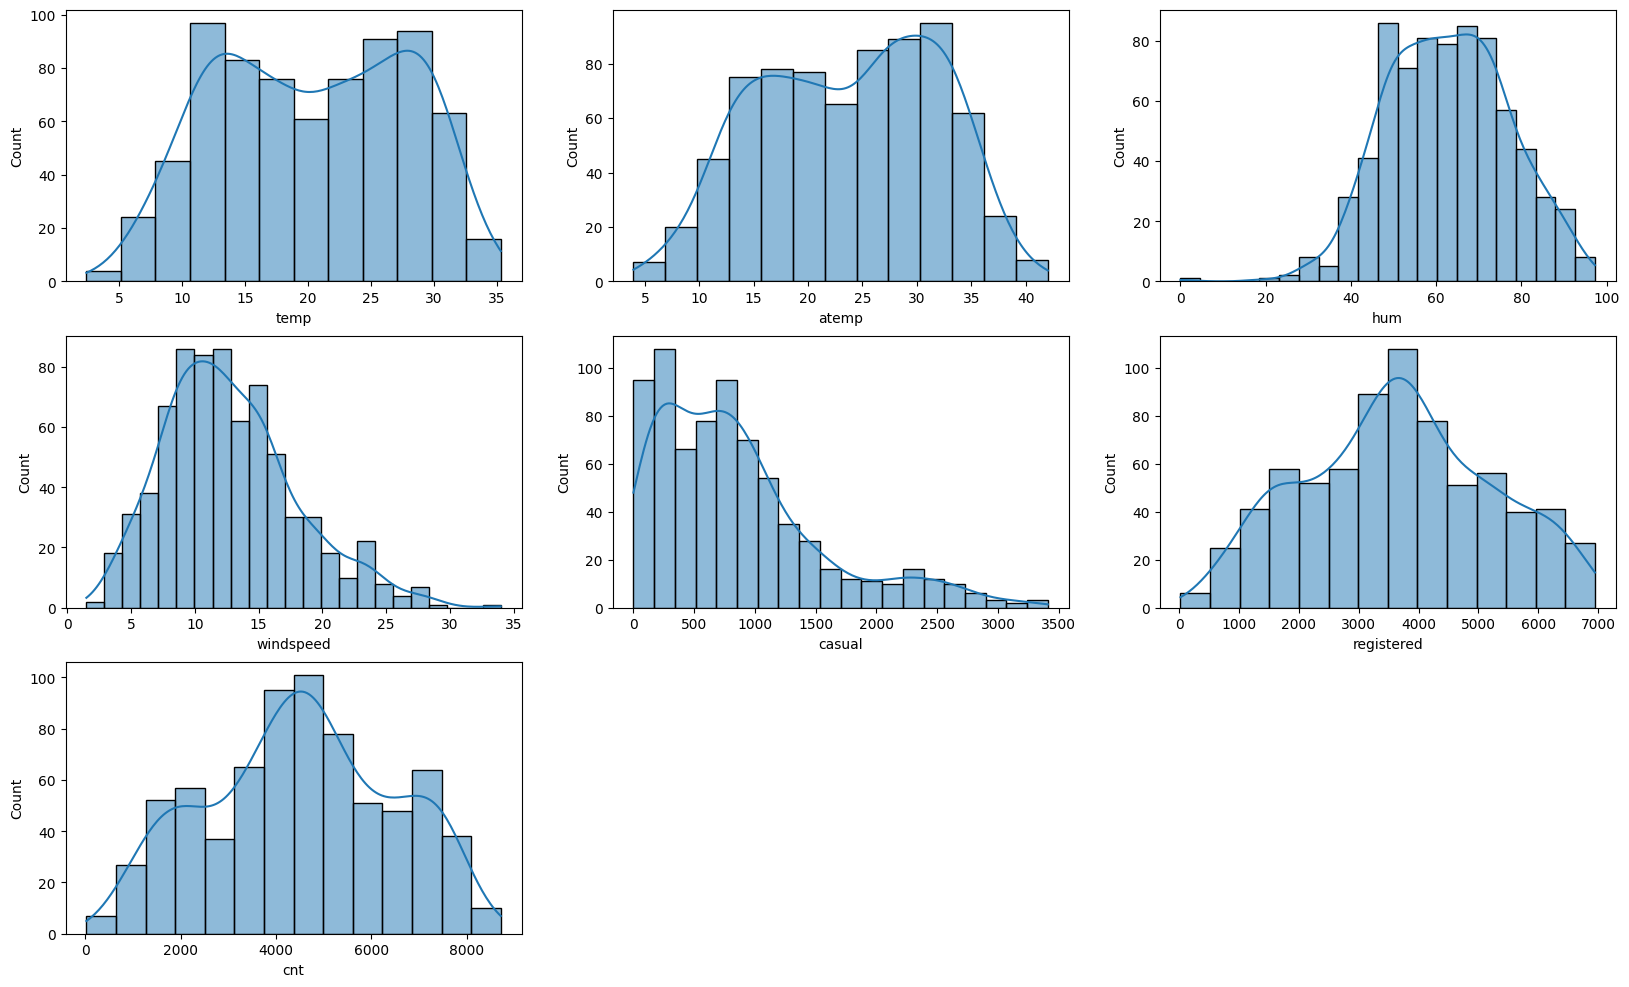

In [345]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.histplot(data = bike_sharing_df.temp, kde=True, palette='Set2')
plt.subplot(3,3,2)
sns.histplot(data = bike_sharing_df.atemp, kde=True, palette='Set2')
plt.subplot(3,3,3)
sns.histplot(data = bike_sharing_df.hum, kde=True, palette='Set2')
plt.subplot(3,3,4)
sns.histplot(data = bike_sharing_df.windspeed, kde=True, palette='Set2')
plt.subplot(3,3,5)
sns.histplot( data = bike_sharing_df.casual, kde=True, palette='Set2')
plt.subplot(3,3,6)
sns.histplot(data = bike_sharing_df.registered, kde=True, palette='Set2')
plt.subplot(3,3,7)
sns.histplot(data = bike_sharing_df.cnt, kde=True, palette='Set2')
plt.show()

### Bivariate Analysis

##### Categorical Variable Analysis
Observations from below boxplot

1. **Season**:
      - Fall (3): Exhibits the highest median rental count and the widest interquartile range (IQR), indicating high variability and generally high rental demand.
      - Summer (2): Also shows high median rentals, but with slightly less variability than fall.
      - Spring (1): Has the lowest median rental count and the narrowest IQR, suggesting lower and less variable demand.
      - Winter (4): Shows a lower median than summer and fall, with a wider IQR than spring. There are also some outliers at the low end of the rental counts.
      - Insight: Fall and summer are the most popular seasons for bike rentals, while spring shows the lowest demand.
2. **Month (mnth)**:
      - Shows seasonal trends, with higher rental counts during the warmer months (roughly May to October) and lower counts during the colder months.
      - Months 5, 6, 7, 8, 9 and 10 have the highest median counts.
      - Months 1,2, 11 and 12 have the lowest median counts.
      - Insight: There's a clear seasonal pattern in bike rentals, peaking during the warmer months.
3. **Weekday**:
      - The median rental counts are relatively consistent across all weekdays.
      - There is a little bit of variance in the upper quartiles, but not by much.
      - Insight: Bike rentals are fairly evenly distributed across the days of the week.
4. **Weather Situation (weathersit)**:
      - Clear (1): Shows the highest median rental count, as expected.
      - Mist + Cloudy (2): Has a slightly lower median than clear weather.
      - Light Snow/Rain (3): Exhibits the lowest median rental count and the narrowest IQR, indicating significantly lower demand in poor weather conditions.
      - Insight: Weather conditions heavily influence bike rental demand. Clear weather leads to the highest rentals, while poor weather significantly reduces demand.
5. **Year (yr)**:
      - 2019 (1): Shows a significantly higher median rental count than 2018 (0).
      - Insight: There's a clear increase in bike rentals from 2018 to 2019, reflecting the growing popularity of the bike-sharing system.
6. **Holiday**:
      - Non-Holiday (0): Shows a slightly higher median rental count than holidays (1).
      - Insight: Rentals are slightly higher on non-holidays.
7. **Workingday**:
      - Working Day (1):
          - The median rental count is slightly higher compared to non-working days.
          - The interquartile range (IQR) is also slightly wider, indicating more variability in rental counts on working days.
          - The maximum rental count is higher on working days.
      - Non-Working Day (0):
          - The median rental count is slightly lower.
          - The IQR is slightly narrower, suggesting less variability.
          - The minimum rental count is higher than working days.
8. **Key Takeaways**:
     - Season and weather conditions are significant factors influencing bike rental demand.
     - There's a clear upward trend in rentals from 2018 to 2019.
     - Weekdays have fairly consistent rental patterns.
     - Holidays have a slightly lower rental rate than non holidays.

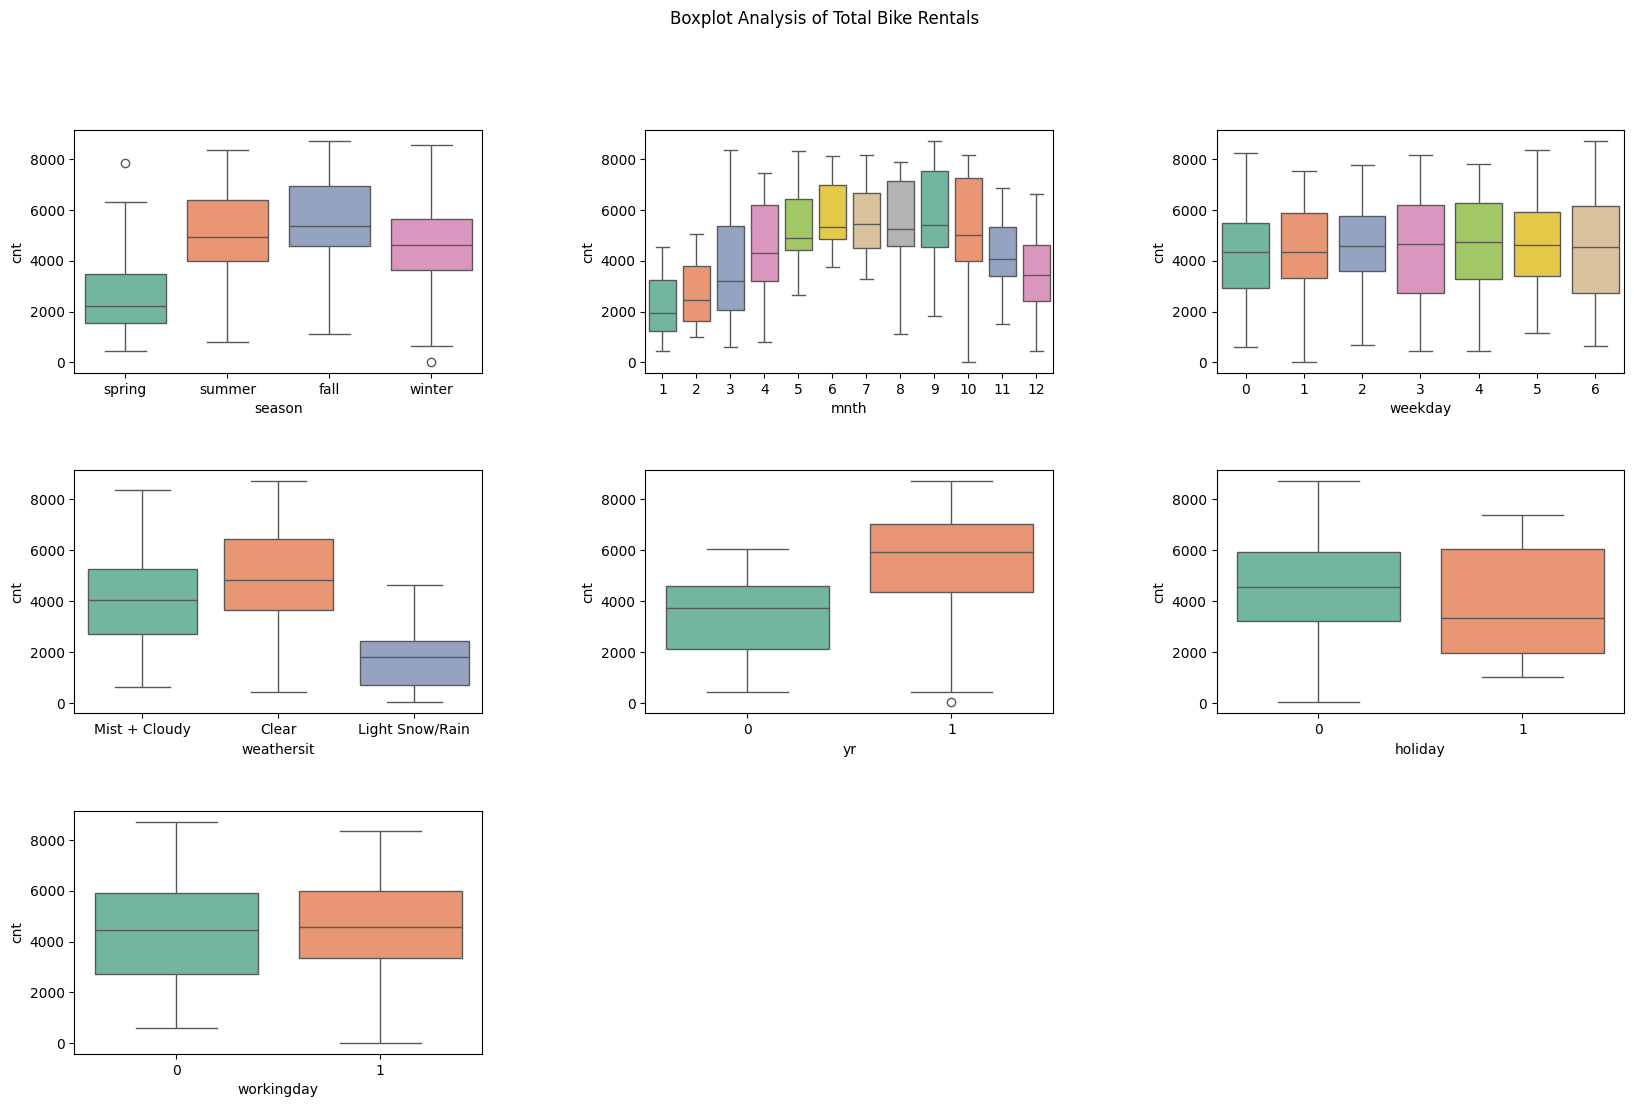

In [346]:
fig = plt.figure(figsize=(20, 12))
fig.suptitle("Boxplot Analysis of Total Bike Rentals")
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing_df, palette='Set2')
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_sharing_df, palette='Set2')
plt.subplot(3,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing_df, palette='Set2')
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing_df, palette='Set2')
plt.subplot(3,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_sharing_df, palette='Set2')
plt.subplot(3,3,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing_df, palette='Set2')
plt.subplot(3,3,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_sharing_df, palette='Set2')
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

##### Numerical Variable Analysis
The pairplot displays scatter plots for each pair of numerical variables and histograms for individual variables along the diagonal. Here's a breakdown:

1. **Temperature (temp) vs. Total Rentals (cnt)**:
      - Scatter Plot: Shows a positive correlation. As temperature increases, the number of bike rentals tends to increase. This is expected, as people are more likely to bike in warmer weather.
      - Histogram (temp): Shows a roughly normal distribution, indicating a good range of temperature values in the dataset.
2. **Feeling Temperature (atemp) vs. Total Rentals (cnt)**:
      - Scatter Plot: Also shows a positive correlation, similar to temp. This is logical since atemp is closely related to temp.
      - Histogram (atemp): Similar to temp, showing a roughly normal distribution.
3. **Humidity (hum) vs. Total Rentals (cnt)**:
      - Scatter Plot: Shows a slightly negative correlation or no strong correlation. The relationship is less clear than with temperature. It appears that at very high humidity levels, the rentals tend to be lower.
      - Histogram (hum): Shows a distribution skewed to the right, indicating that the dataset contains more days with higher humidity.
4. **Windspeed (windspeed) vs. Total Rentals (cnt)**
      - Scatter Plot: Shows a slightly negative correlation or no strong correlation. Higher wind speeds seem to be associated with slightly lower rental counts, though the relationship is not very strong.
      - Histogram (windspeed): Shows a right-skewed distribution, indicating that most days have lower wind speeds.
5. **Key Observations and Insights**:
      - Temperature is a Key Factor: Both temp and atemp show a strong positive correlation with cnt, suggesting that temperature is a significant factor in bike rental demand.
      - Humidity and Windspeed Have Weaker Influence: hum and windspeed show weaker correlations with cnt. While high humidity and high wind speeds might slightly reduce rentals, their impact is less pronounced than temperature.
      - Linear Relationships: The scatter plots suggest relatively linear relationships between temperature variables and cnt.

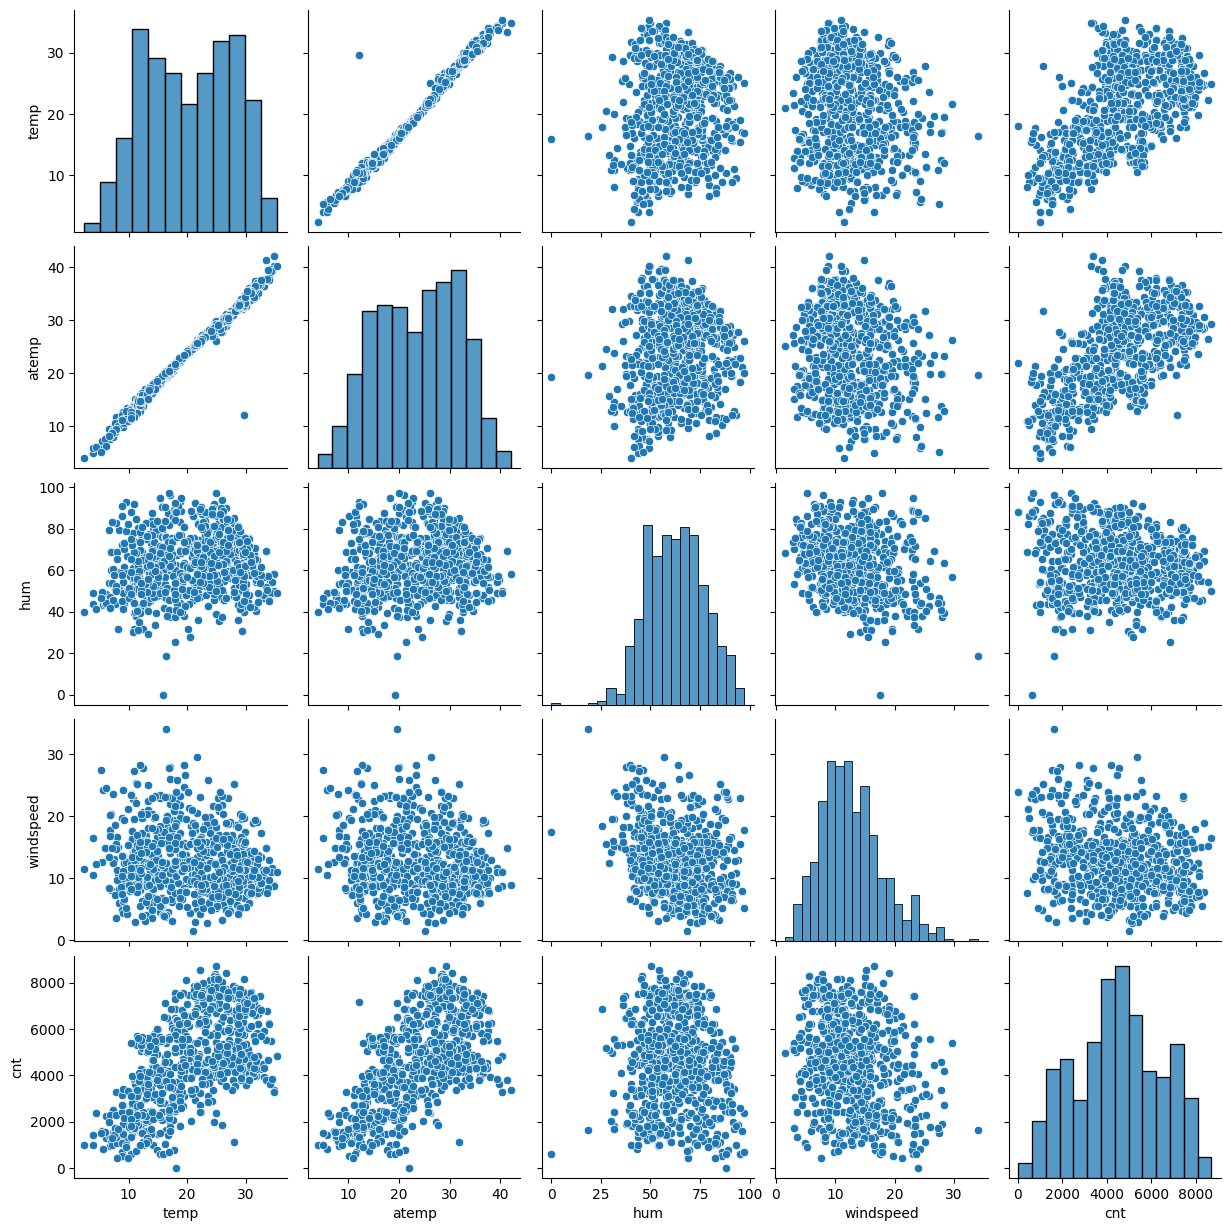

In [347]:
#make a pairplot of all the numeric variables
sns.pairplot(bike_sharing_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']])
plt.show()

### Multivariate Analysis
Here's a breakdown of the key correlations observed:

1. **Strong Positive Correlations**:
    - **temp and atemp (0.99)**: This is an extremely strong positive correlation, indicating that temperature ("temp") and "feels like" temperature ("atemp") are almost perfectly linearly related. This is expected, as "atemp" is derived from "temp".
    - **registered and cnt (0.95)**: There's a very high positive correlation between the number of registered bike rentals ("registered") and the total
      count of bike rentals ("cnt"). This is logical because "cnt" is the sum of "casual" and "registered" rentals.
    - **casual and cnt (0.67)**: A strong positive correlation exists between the number of casual rentals and the total count.
    - **temp/atemp and cnt (0.63)**: There's a notable positive correlation between temperature (both "temp" and "atemp") and the total bike rental count. This suggests that warmer temperatures tend to lead to more bike rentals.
    - **temp/atemp and casual (0.54)**: Temperature also has a moderate positive correlation with casual rentals.
2. **Weak Correlations**:
    - **hum and other variables**: Humidity ("hum") shows relatively weak correlations with other variables, suggesting it doesn't have a strong linear relationship with them.
    - **windspeed and other variables**: Similar to humidity, windspeed also shows weak correlations, indicating it's not a major driver of bike rentals based on this linear analysis.
3. **Negative Correlations**:
    - **hum and windspeed (-0.25)**: There is a slight negative correlation between humidity and windspeed.
    - **hum and cnt/casual/registered (-0.075 to -0.099)**: There is a very slight negative correlation between humidity and the bike rental counts, which is likely not practically significant.
4. **Key Insights**:
    - **Temperature is a Major Factor**: Temperature (both "temp" and "atemp") appears to be a significant factor influencing bike rentals, particularly casual rentals and the overall count.
    - **Registered Rentals Dominate**: The high correlation between "registered" and "cnt" suggests that registered users make up a large portion of the total rentals.
    - **Humidity and Windspeed Less Influential**: Based on this linear correlation analysis, humidity and windspeed don't seem to have a strong direct impact on bike rentals.
    - **Multicollinearity**: The extremely high correlation between "temp" and "atemp" indicates multicollinearity. This means these variables provide redundant information and could cause issues in some statistical models (e.g., linear regression). You might consider removing one of them.

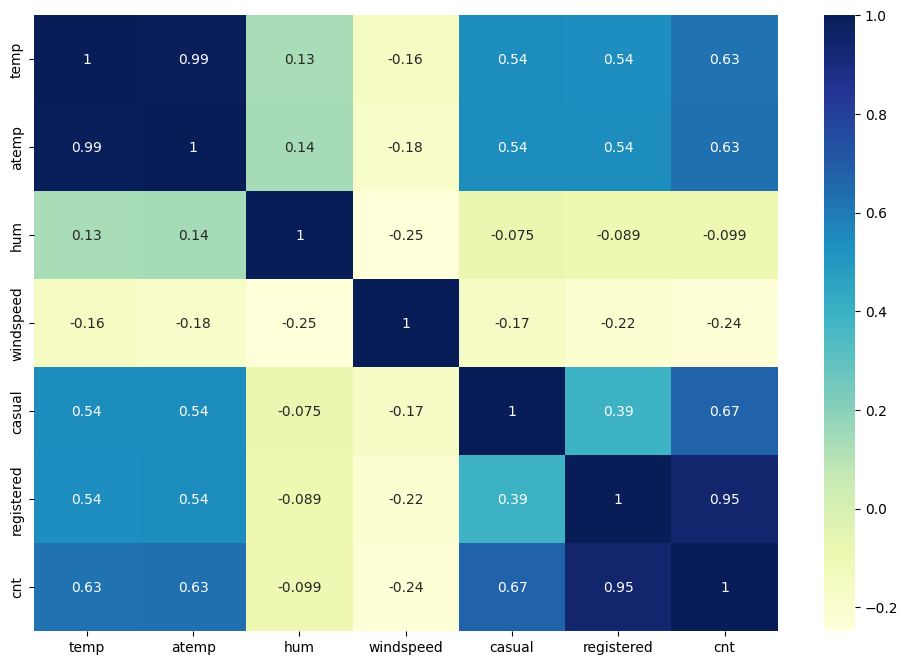

In [348]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (12, 8))
sns.heatmap(bike_sharing_df[['temp', 'atemp', 'hum', 'windspeed','casual', 'registered', 'cnt']].corr(), annot = True, cmap="YlGnBu")
plt.show()

# Step-3 Model Building and Evaluation

### Data Preparation for Model Building

In [349]:
# create Weekend variable, with value 1 at weekends and 0 at weekdays
def cond(i):
    if i % 7 == 5: return 1
    elif i % 7 == 4: return 1
    else :return 0
    return i

bike_sharing_df['weekend']=[cond(i) for i in bike_sharing_df['weekday']]

In [350]:
bike_sharing_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekend
0,2018-01-01,spring,0,1,0,6,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2018-01-02,spring,0,1,0,0,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,0
2,2018-01-03,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0
3,2018-01-04,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0
4,2018-01-05,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0


In [351]:
bike_sharing_df.workingday.value_counts()

workingday
1    499
0    231
Name: count, dtype: int64

In [352]:
bike_sharing_df.weekday.value_counts()

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

In [353]:
bike_sharing_df.weekend.value_counts()

weekend
0    522
1    208
Name: count, dtype: int64

##### DROP `dteday` - we already have the year (`yr`), month (`mnth`), `weekday`, and other temporal features derived from dteday, the original date column might be redundant. Therefore, it's likely safe to delete the `dteday` column.

In [354]:
bike_sharing_df.drop('dteday', axis=1, inplace=True) 

In [355]:
bike_sharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekend
0,spring,0,1,0,6,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,spring,0,1,0,0,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,0
2,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0
3,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0
4,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0


#### Model Obejctive is to predict the total number of bike rentals (`cnt`), including columns `casual` and `registered` as separate features might introduce redundancy or multicollinearity. Since `cnt` is the sum of `casual` and `registered`, they are perfectly correlated with cnt.

#### Removing columns(`casual`, `registered`) can simplify the model and potentially improve its interpretability.

In [356]:
bike_sharing_df.drop(['casual', 'registered'], axis=1, inplace=True)

In [357]:
bike_sharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,weekend
0,spring,0,1,0,6,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,1,0,0,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801,0
2,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,0
3,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,0
4,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,0


#### DROP `atemp` (feeling temperature) - `atemp` and `temp` are very highly correlated and redundancy.
#### This means they provide almost the same information to model. Including both can lead to `multicollinearity`, which can cause problems in linear regression models.

In [358]:
bike_sharing_df.drop('atemp', axis=1, inplace=True)

In [359]:
bike_sharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,weekend
0,spring,0,1,0,6,0,Mist + Cloudy,14.110847,80.5833,10.749882,985,0
1,spring,0,1,0,0,0,Mist + Cloudy,14.902598,69.6087,16.652113,801,0
2,spring,0,1,0,1,1,Clear,8.050924,43.7273,16.636703,1349,0
3,spring,0,1,0,2,1,Clear,8.200000,59.0435,10.739832,1562,0
4,spring,0,1,0,3,1,Clear,9.305237,43.6957,12.522300,1600,0


In [360]:
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
 11  weekend     730 non-null    int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 68.6+ KB


### Dummy Variables
In order to fit a regression line, we would need numerical values and not strings. Hence, we need to convert them to 1s and 0s.

Create dummy variables for categorical features - `season`, `weathersit` and drop the first column can be identified with just the last two columns. 
- **Example**
  - `00` will correspond to weathersit_Clear
  - `01` will correspond to weathersit_Mist + Cloudy
  - `10` will correspond to weathersit_Light Snow/Rain

In [361]:
# Create dummy variables for categorical features - 'season', 'weathersit' and drop the first column.
categorical_cols = ['season', 'weathersit']
dummy_var_df = pd.get_dummies(bike_sharing_df[categorical_cols], dtype='int', drop_first = True)

In [362]:
dummy_var_df.head()

,season_spring,season_summer,season_winter,weathersit_Light Snow/Rain,weathersit_Mist + Cloudy
0,1,0,0,0,1
1,1,0,0,0,1
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [363]:
# Add the results to the original bike sharing dataframe
bike_sharing_df = pd.concat([bike_sharing_df, dummy_var_df], axis = 1)

In [364]:
# Now let's see the head of our dataframe.
bike_sharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,weekend,season_spring,season_summer,season_winter,weathersit_Light Snow/Rain,weathersit_Mist + Cloudy
0,spring,0,1,0,6,0,Mist + Cloudy,14.110847,80.5833,10.749882,985,0,1,0,0,0,1
1,spring,0,1,0,0,0,Mist + Cloudy,14.902598,69.6087,16.652113,801,0,1,0,0,0,1
2,spring,0,1,0,1,1,Clear,8.050924,43.7273,16.636703,1349,0,1,0,0,0,0
3,spring,0,1,0,2,1,Clear,8.200000,59.0435,10.739832,1562,0,1,0,0,0,0
4,spring,0,1,0,3,1,Clear,9.305237,43.6957,12.522300,1600,0,1,0,0,0,0


In [365]:
# Drop 'season', 'weathersit' as we have created the dummies for it
bike_sharing_df.drop(['season', 'weathersit'], axis = 1, inplace = True)

In [366]:
bike_sharing_df.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,weekend,season_spring,season_summer,season_winter,weathersit_Light Snow/Rain,weathersit_Mist + Cloudy
0,0,1,0,6,0,14.110847,80.5833,10.749882,985,0,1,0,0,0,1
1,0,1,0,0,0,14.902598,69.6087,16.652113,801,0,1,0,0,0,1
2,0,1,0,1,1,8.050924,43.7273,16.636703,1349,0,1,0,0,0,0
3,0,1,0,2,1,8.200000,59.0435,10.739832,1562,0,1,0,0,0,0
4,0,1,0,3,1,9.305237,43.6957,12.522300,1600,0,1,0,0,0,0


### Splitting the Data into Training and Testing Sets
First step for regression is performing a train-test split.

In [367]:
# We specify this so that the train and test data set always have the same rows, respectively
bike_sharing_df_train, bike_sharing_df_test = train_test_split(bike_sharing_df, train_size = 0.7, random_state = 42)

In [368]:
print(bike_sharing_df_train.shape)
print(bike_sharing_df_test.shape)

(510, 15)
(220, 15)


In [369]:
bike_sharing_df.shape

(730, 15)

### Rescaling the Features
Here we can see that except for `temp`, `hum`, `windspeed`, `cnt` all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale.
There are two common ways of rescaling:
1. Min-Max scaling
2. Standardisation (mean-0, sigma-1)

In this Model, we are use MinMax scaling.

In [370]:
scaler = MinMaxScaler()

In [371]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars=['temp', 'hum', 'windspeed', 'weekday', 'mnth', 'cnt']

bike_sharing_df_train[num_vars] = scaler.fit_transform(bike_sharing_df_train[num_vars])

In [372]:
bike_sharing_df_train.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,weekend,season_spring,season_summer,season_winter,weathersit_Light Snow/Rain,weathersit_Mist + Cloudy
645,1,0.818182,1,0.166667,0,0.403972,0.731215,0.419004,0.609320,0,0,0,1,0,1
163,0,0.454545,0,0.166667,1,0.717562,0.509660,0.708724,0.554026,0,0,1,0,0,0
360,0,1.000000,0,0.333333,1,0.331287,0.785745,0.415925,0.088253,0,1,0,0,0,1
640,1,0.818182,0,0.500000,1,0.745598,0.817947,0.110593,0.862127,0,0,0,1,0,1
625,1,0.727273,0,0.333333,1,0.703024,0.899098,0.839562,0.439696,0,0,0,0,0,1


In [373]:
bike_sharing_df_train.describe()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,weekend,season_spring,season_summer,season_winter,weathersit_Light Snow/Rain,weathersit_Mist + Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.519608,0.507130,0.027451,0.494771,0.668627,0.551313,0.654203,0.415045,0.497429,0.274510,0.231373,0.258824,0.24902,0.029412,0.345098
std,0.500106,0.310567,0.163554,0.338814,0.471169,0.227237,0.143788,0.185760,0.234207,0.446705,0.422124,0.438419,0.43287,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.272727,0.000000,0.166667,0.000000,0.354526,0.544033,0.281934,0.344772,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,0.545455,0.000000,0.500000,1.000000,0.575824,0.660798,0.384737,0.501871,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,0.818182,0.000000,0.833333,1.000000,0.745338,0.756977,0.526489,0.677080,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


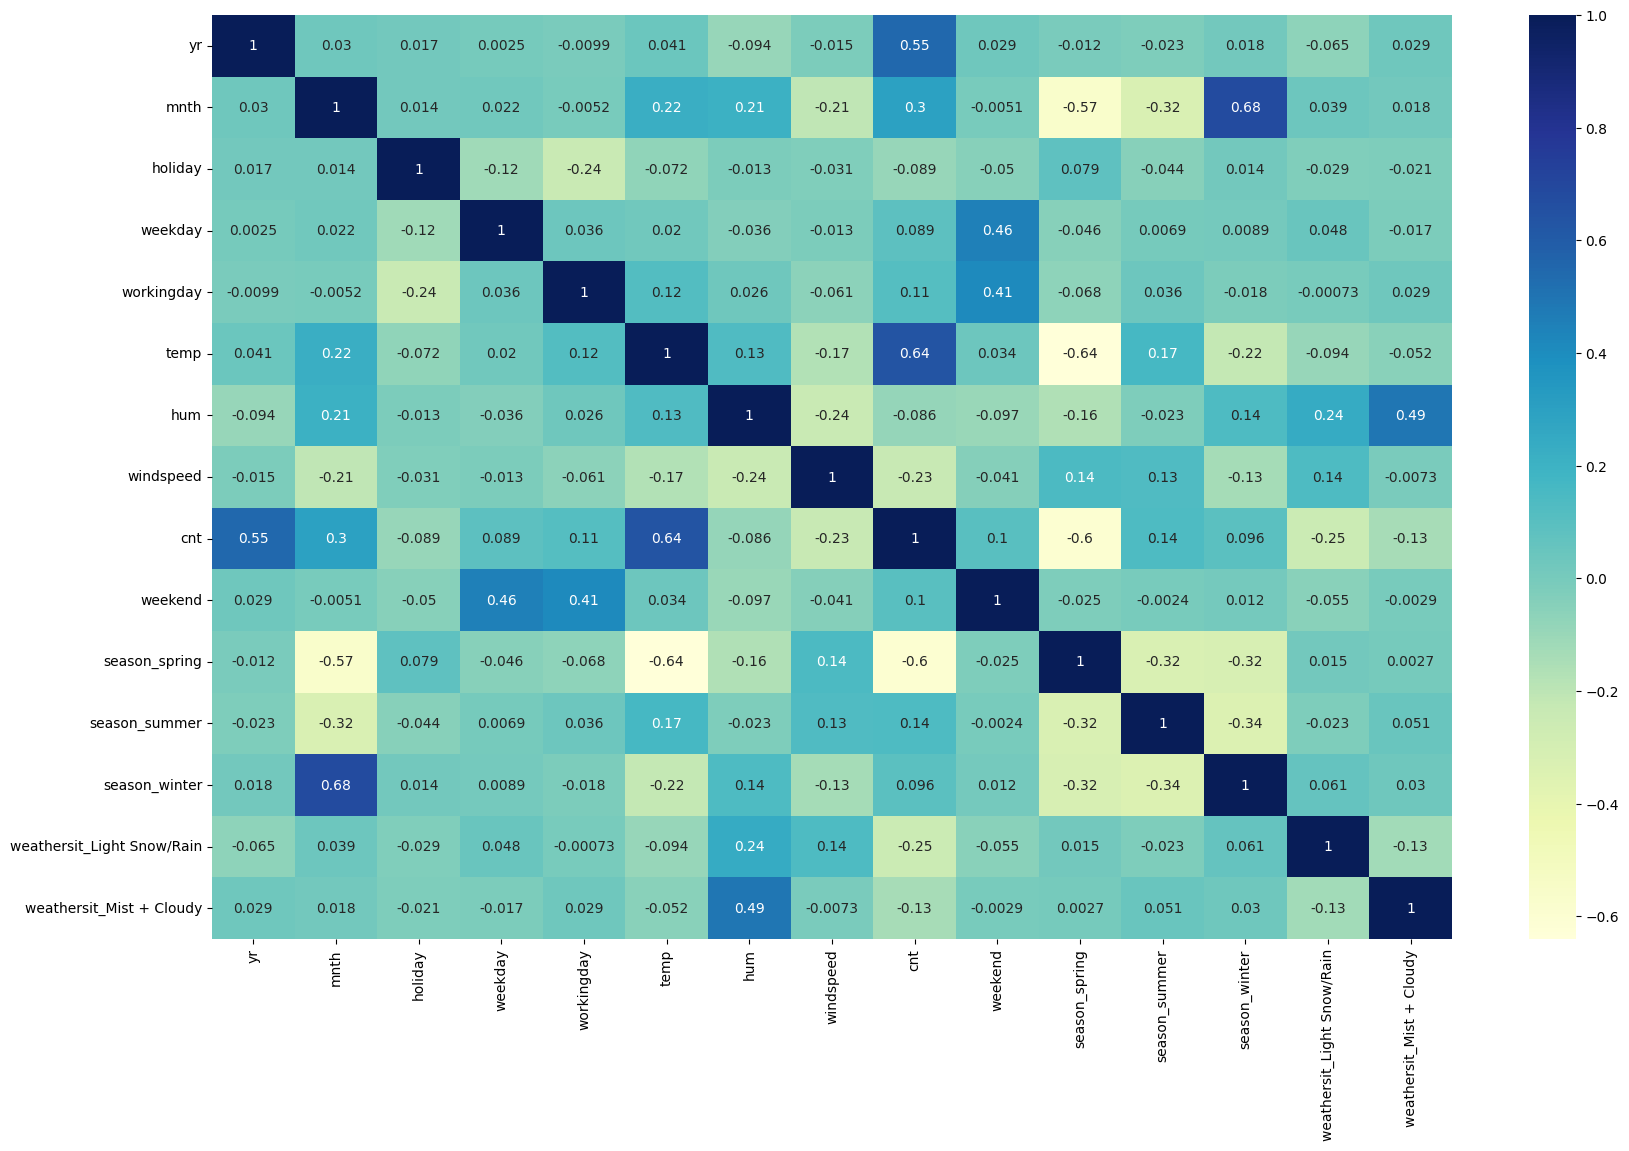

In [374]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 12))
sns.heatmap(bike_sharing_df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

##### From above correlation matrix, below are the observations
1. `temp` and `yr` are having strong positive correlation to `cnt`
2. `windspeed` and `hum` are having weak negative correlation to `cnt`, indicating that as windspeed or humidity increases, bike rentals tend to decrease slightly.

#### Dividing into X and Y sets for the model building

In [375]:
y_train = bike_sharing_df_train.pop('cnt')
X_train = bike_sharing_df_train

In [376]:
print(X_train.shape)
print(y_train.shape)

(510, 14)
(510,)


#### Building Linear Model
Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

#### Model - 1

In [377]:
# Add a constant
X_train_sm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_sm).fit()

In [378]:
# Check the parameters obtained

lr.params

const    0.136333
temp     0.654975
dtype: float64

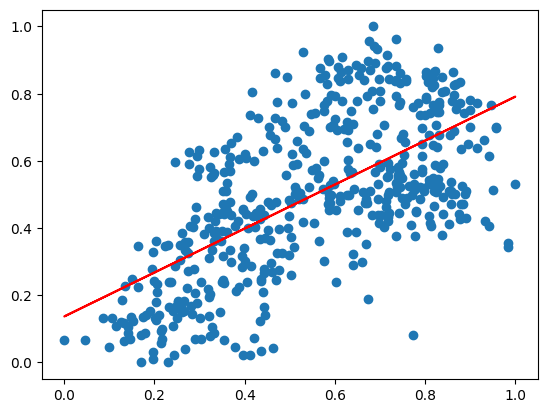

In [379]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_sm.iloc[:, 1], y_train)
plt.plot(X_train_sm.iloc[:, 1], 0.137 + 0.654*X_train_sm.iloc[:, 1], 'r')
plt.show()

In [380]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     344.1
Date:                Tue, 25 Feb 2025   Prob (F-statistic):           4.86e-59
Time:                        12:49:13   Log-Likelihood:                 149.03
No. Observations:                 510   AIC:                            -294.1
Df Residuals:                     508   BIC:                            -285.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1363      0.021      6.476      0.0

### Adding another variable
The R-squared value obtained is `0.404`. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the second most highly correlated variable, i.e. `yr`.

### Model - 2

In [381]:
# Assign all the feature variables to X
X_train_lm = X_train[['temp', 'yr']]

In [382]:
X_train_sm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_sm).fit()

lr.params

const    0.021477
temp     0.632969
yr       0.244392
dtype: float64

In [383]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     528.2
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          1.05e-124
Time:                        12:49:16   Log-Likelihood:                 304.30
No. Observations:                 510   AIC:                            -602.6
Df Residuals:                     507   BIC:                            -589.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0215      0.017      1.301      0.1

#### We have clearly improved the model as the value of `Adjusted R-squared` as its value has gone up to `0.674` from `0.403`. 
Now let's go ahead and add all the feature variables.

#### Adding all the variables to the model

In [384]:
bike_sharing_df.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'hum',
       'windspeed', 'cnt', 'weekend', 'season_spring', 'season_summer',
       'season_winter', 'weathersit_Light Snow/Rain',
       'weathersit_Mist + Cloudy'],
      dtype='object')

### Model - 3

In [385]:
#Build a linear model
X_train_sm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_sm).fit()

lr_1.params

const                         0.252931
yr                            0.238544
mnth                         -0.045754
holiday                      -0.057785
weekday                       0.045499
workingday                    0.018440
temp                          0.487238
hum                          -0.123331
windspeed                    -0.122374
weekend                      -0.003435
season_spring                -0.130918
season_summer                 0.024576
season_winter                 0.099435
weathersit_Light Snow/Rain   -0.230010
weathersit_Mist + Cloudy     -0.057299
dtype: float64

In [386]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     166.2
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          8.44e-177
Time:                        12:49:19   Log-Likelihood:                 461.03
No. Observations:                 510   AIC:                            -892.1
Df Residuals:                     495   BIC:                            -828.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

##### Drop columns with `p-values>0.05`

##### Looking at the `p-values`, it looks like some of the variables aren't really significant (in the presence of other variables).We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information.

1. **Statistically significant predictors `(P>|t| < 0.05)`**:
     - `yr (Year)`: The coefficient is 0.2385, and it's highly statistically significant (p < 0.001). This suggests a strong positive trend in bike rentals from 2018 to 2019.
     - `temp (Temperature)`: The coefficient is 0.4872, and it's highly significant. This indicates a strong positive relationship: higher temperatures lead to more rentals.
     - `hum (Humidity)`: The coefficient is -0.1233, and it's statistically significant. This suggests a negative relationship: higher humidity is associated with fewer rentals.
     - `windspeed`: The coefficient is -0.1224, and it's statistically significant. This indicates that higher wind speeds are associated with fewer rentals.
    - `season_spring, season_winter`: These are dummy variables for seasons. Spring has a significant negative coefficient, suggesting fewer rentals compared to the baseline season (likely fall). Winter has a significant positive coefficient, indicating more rentals compared to the baseline.
    - `weathersit_Light Snow/Rain, weathersit_Mist + Cloudy`: These weather situation variables have negative and significant coefficients. This means that these weather conditions are associated with fewer rentals compared to clear weather.
    - `holiday`: Holidays have a significant negative impact. Rentals are significantly lower on holidays.
    - `weekday`: The day of the week has a significant impact. Rentals vary significantly depending on the day of the week.

2. **Insignificant Predictors**:
   - `mnth (Month)`: While included in the model, the p-value is 0.082, slightly above the typical 0.05 significance level. This suggests its effect might not be as strong in this model.
   - `workingday, weekend`: Some of these variables have p-values above 0.05, indicating their effects are not as statistically significant in this particular model.
   - `season_summer`: Compared to the reference season, summer does not have a significant impact.Rentals are not significantly different in summer (compared to fall).

### Checking VIF
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model.

`VIF Threashold` is greater than `5`, drop columns

In [387]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,hum,28.82
5,temp,16.45
1,mnth,11.31
7,windspeed,5.75
9,season_spring,4.11
3,weekday,4.10
4,workingday,4.08
11,season_winter,3.97
10,season_summer,2.50
8,weekend,2.26


##### DROP Columns with `VIF ≥ 5` - High multicollinearity
Analysis of the VIF Results:
1. **Severe Multicollinearity**:
   - The VIF values for `hum` (28.82), `temp` (16.45), and `mnth` (11.31) are extremely high, indicating severe multicollinearity.  This means these variables are very strongly correlated with other variables in your model.
2. **High Multicollinearity**:
   - `windspeed`(5.75) also shows high multicollinearity, though not as severe as the first three.
3. **Moderate Multicollinearity**:
   - The variables `season_spring`, `weekday`, `workingday`, and `season_winter` have VIFs in the range of 2-5, indicating moderate multicollinearity.
4. **Low Multicollinearity**:
   - The remaining variables (`season_summer`, `weekend`, `weathersit_Mist + Cloudy`, `yr`, `weathersit_Light Snow/Rain`, and `holiday`) have VIFs below 2, suggesting relatively low multicollinearity.

#### Drop the columns having high p-value, VIF using below algorithm
- `High p-value, High VIF`
- `High-Low`
   - `High p-value, Low VIF` - Drop columns first with these combination.
   - `Low p-value, High VIF` - Drop columns if first condition is not satsified.
- `Low p-value, Low VIF`

### Build Model using `Recursive feature elimination`
we will be using the `LinearRegression` function from `SciKit` Learn for its compatibility with RFE (which is a utility from sklearn).

In [388]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [389]:
for feature, support, ranking in zip(X_train.columns, rfe.support_, rfe.ranking_):
        print(f"Feature: {feature}, Support: {bool(support)}, Ranking: {int(ranking)}")

Feature: yr, Support: True, Ranking: 1
Feature: mnth, Support: True, Ranking: 1
Feature: holiday, Support: True, Ranking: 1
Feature: weekday, Support: False, Ranking: 2
Feature: workingday, Support: False, Ranking: 4
Feature: temp, Support: True, Ranking: 1
Feature: hum, Support: True, Ranking: 1
Feature: windspeed, Support: True, Ranking: 1
Feature: weekend, Support: False, Ranking: 5
Feature: season_spring, Support: True, Ranking: 1
Feature: season_summer, Support: False, Ranking: 3
Feature: season_winter, Support: True, Ranking: 1
Feature: weathersit_Light Snow/Rain, Support: True, Ranking: 1
Feature: weathersit_Mist + Cloudy, Support: True, Ranking: 1


In [390]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'mnth', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'weathersit_Light Snow/Rain',
       'weathersit_Mist + Cloudy'],
      dtype='object')

In [391]:
X_train.columns[~rfe.support_]

Index(['weekday', 'workingday', 'weekend', 'season_summer'], dtype='object')

### Building model using statsmodel, for the detailed statistics

### Model - 4

In [392]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [393]:
# Adding a constant variable 
X_train_rfe_sm = sm.add_constant(X_train_rfe)

In [394]:
lm = sm.OLS(y_train,X_train_rfe_sm).fit()   # Running the linear model

In [395]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     225.4
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          6.55e-178
Time:                        12:49:30   Log-Likelihood:                 452.65
No. Observations:                 510   AIC:                            -883.3
Df Residuals:                     499   BIC:                            -836.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [396]:
# Calculate VIF
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif= vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
4,hum,22.84
3,temp,15.08
1,mnth,9.86
5,windspeed,4.87
7,season_winter,3.72
6,season_spring,2.64
9,weathersit_Mist + Cloudy,2.18
0,yr,2.08
8,weathersit_Light Snow/Rain,1.23
2,holiday,1.04


### From the above VIF results `VIF > 5`:
- `hum` (22.84), `temp` (15.08), and `mnth` (9.86) are having high VIF values, indicating that significant multicollinearity.
- `windspeed`: At 4.87, windspeed is still close to the threshold of 5, suggesting some lingering multicollinearity.
- Remaining variables have VIFs below 4, which is generally better, but it's important to remember that multicollinearity can affect the interpretation of all coefficients, even if their own VIFs are not extremely high.

#### As per VIF results and algorithm - Low p-value, High VIF removing `hum` variable from dataset. `hum` is insignificant in the model.

In [397]:
# Drop 'hum' column from dataset
X_train_new = X_train_rfe.drop(["hum"], axis = 1)

#### Model - 5
Rebuild Model without `hum`

In [398]:
# Adding a constant variable  
X_train_sm = sm.add_constant(X_train_new)

In [399]:
lm = sm.OLS(y_train,X_train_sm).fit()   # Running the linear model

In [400]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     245.1
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          4.79e-177
Time:                        12:49:36   Log-Likelihood:                 447.76
No. Observations:                 510   AIC:                            -875.5
Df Residuals:                     500   BIC:                            -833.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

#### Model build after removing `hum` column, doesn't have much impact on the `R-squared` and `Adj. R-squared`.

In [401]:
# Calculate VIF
vif=pd.DataFrame()
vif['Features']=X_train_new.columns
vif['VIF']=[variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif= vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,mnth,9.49
3,temp,7.48
4,windspeed,4.79
6,season_winter,3.45
0,yr,2.08
5,season_spring,1.68
8,weathersit_Mist + Cloudy,1.53
7,weathersit_Light Snow/Rain,1.09
2,holiday,1.04


#### As per VIF results and algorithm - Low p-value, High VIF removing `mnth` variable from dataset. `mnth` is insignificant in the model.

In [402]:
# Drop 'hum' column from dataset
X_train_new_1 = X_train_new.drop(["mnth"], axis = 1)

### Model - 6
Rebuild Model without `mnth`

In [403]:
# Adding a constant variable  
X_train_sm = sm.add_constant(X_train_new_1)

In [404]:
lm = sm.OLS(y_train,X_train_sm).fit()   # Running the linear model

In [405]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     270.7
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          1.91e-176
Time:                        12:49:40   Log-Likelihood:                 443.44
No. Observations:                 510   AIC:                            -868.9
Df Residuals:                     501   BIC:                            -830.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

#### Model build after removing `mnth` column, have slight impact on the `R-squared` and `Adj. R-squared`.

In [406]:
# Calculate VIF
vif=pd.DataFrame()
vif['Features']=X_train_new_1.columns
vif['VIF']=[variance_inflation_factor(X_train_new_1.values,i) for i in range(X_train_new_1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif= vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,windspeed,4.78
2,temp,4.06
0,yr,2.07
4,season_spring,1.67
7,weathersit_Mist + Cloudy,1.52
5,season_winter,1.36
6,weathersit_Light Snow/Rain,1.08
1,holiday,1.04


### VIF Analysis after removing `hum` and `mnth`:
- **Acceptable Multicollinearity**: All VIF values are now below 5, which is generally considered a good threshold.  This suggests that multicollinearity has been effectively addressed in your model.
- **windspeed and temp**: While windspeed and temp had higher VIFs in previous iterations, they are now below 5. This is a significant improvement.
- **Other Variables**: The remaining variables all have VIFs below 2, indicating minimal multicollinearity.

### `Model - 6` is considered as final model. Variables selected after `RFE` process are significant in predicting the bike sharing demand. All the VIF and p-values are in acceptable range.

In [407]:
# Final Model (after iterative removal of features)
X_train_final = sm.add_constant(X_train_new_1)
lr_final = sm.OLS(y_train, X_train_final).fit()
print(lr_final.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     270.7
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          1.91e-176
Time:                        12:49:43   Log-Likelihood:                 443.44
No. Observations:                 510   AIC:                            -868.9
Df Residuals:                     501   BIC:                            -830.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

### Overall Model Fit:
- `R-squared (0.812)`: The model explains approximately 81.2% of the variance in total bike rentals (cnt).
- `Adjusted R-squared (0.809)`: This is a slightly more conservative estimate, adjusting for the number of predictors. It's very close to the R-squared, suggesting that the model isn't overfitting despite having fewer predictors.

# Step-4 Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [408]:
y_train_cnt = lr_final.predict(X_train_final)

Text(0.5, 0, 'Errors')

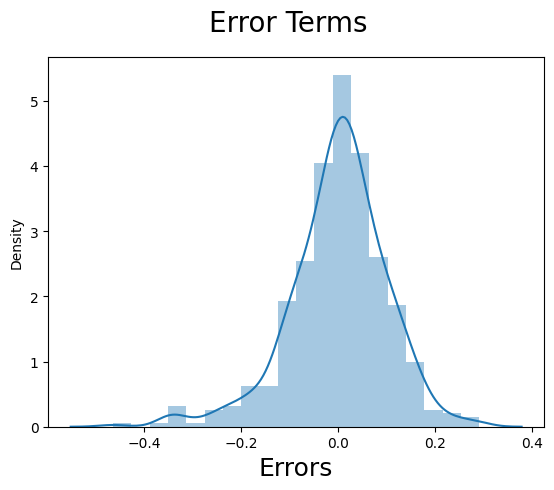

In [409]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

### Calculate the R-squared score on the train set

In [410]:
r2_train = r2_score(y_train,y_train_cnt)
r2_train

0.8120929337714919

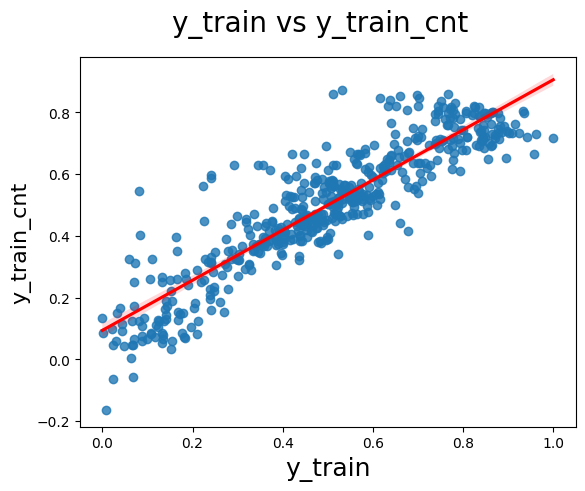

In [411]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
sns.regplot(x = y_train,y = y_train_cnt, line_kws={'color':'red'})
fig.suptitle('y_train vs y_train_cnt', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('y_train_cnt', fontsize=16)
plt.show()

# Step 5: Making Predictions Using the Final Model

#### Applying the scaling on the test sets

In [412]:
num_vars=['temp', 'hum', 'windspeed', 'weekday', 'mnth', 'cnt']
bike_sharing_df_test[num_vars] = scaler.transform(bike_sharing_df_test[num_vars])

In [413]:
bike_sharing_df_test.describe()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,weekend,season_spring,season_summer,season_winter,weathersit_Light Snow/Rain,weathersit_Mist + Cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.454545,0.491322,0.031818,0.510606,0.718182,0.526557,0.629591,0.435018,0.480125,0.309091,0.281818,0.236364,0.231818,0.027273,0.318182
std,0.499065,0.321148,0.175916,0.324289,0.450911,0.229808,0.152237,0.212390,0.232713,0.463173,0.450911,0.425817,0.422956,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.047675,0.193646,0.060760,-0.049378,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.181818,0.000000,0.166667,0.000000,0.324018,0.521081,0.281540,0.287849,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.454545,0.000000,0.500000,1.000000,0.505733,0.609274,0.414837,0.472957,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.727273,0.000000,0.833333,1.000000,0.725609,0.734893,0.533519,0.639291,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.970925,1.002146,1.214955,0.980804,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [414]:
y_test = bike_sharing_df_test.pop('cnt')
X_test = bike_sharing_df_test

In [415]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new_1.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [416]:
# Making predictions
y_pred = lm.predict(X_test_new)

# Step-6: Model Evaluation

Let's now plot the graph for actual versus predicted values.

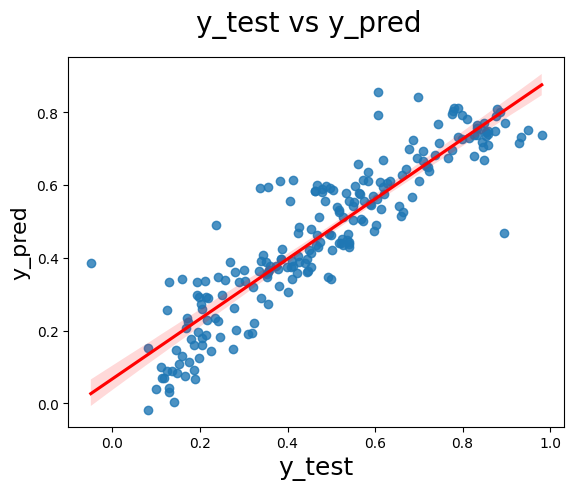

In [417]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
sns.regplot(x = y_test,y = y_pred, line_kws={'color':'red'})
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)
plt.show()

### Calculate the `R-squared score` on the test set

In [418]:
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.8171524109234533


### Residual Analysis on test set

In [419]:
residuals = y_test - y_pred
residuals

468    0.180584
148    0.013114
302   -0.038078
355    0.124790
515    0.067775
         ...   
532    0.059119
558    0.108867
137    0.037220
314    0.081729
683    0.044885
Length: 220, dtype: float64

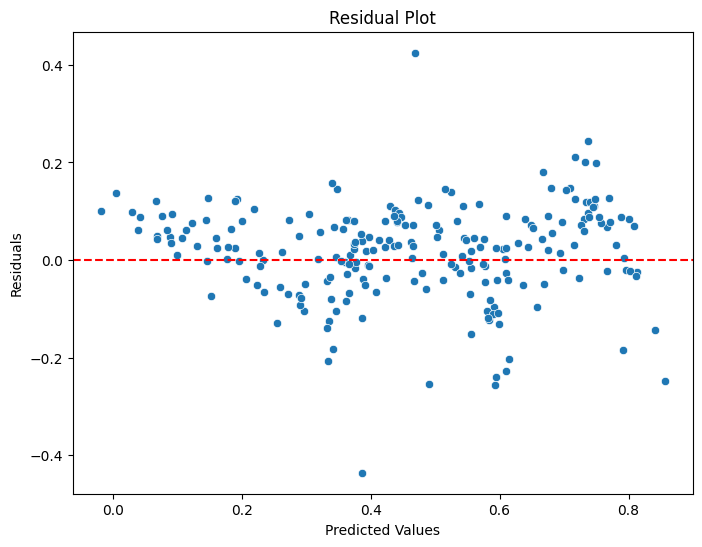

In [420]:
# Plot residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

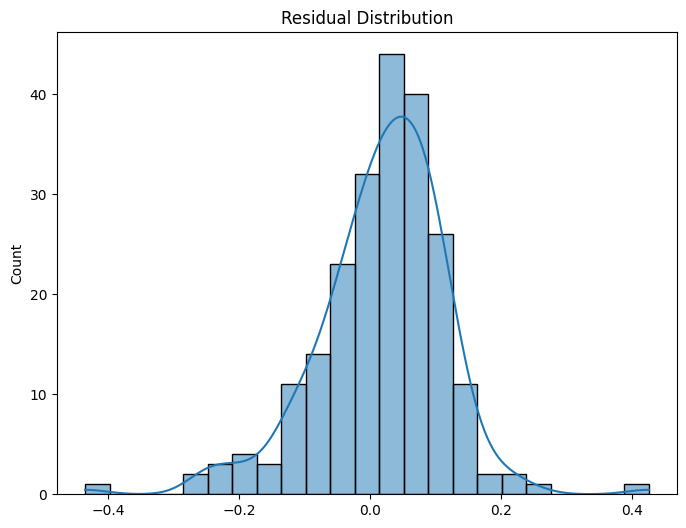

In [421]:
# Check for normality of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution')
plt.show()

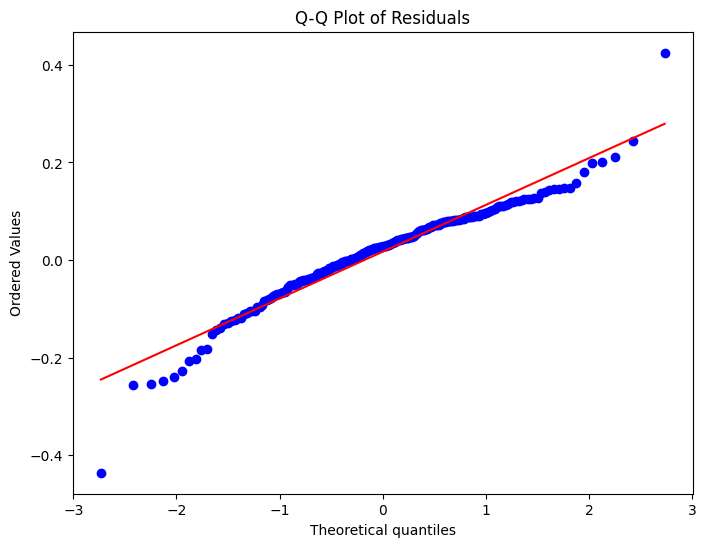

In [422]:
# Q-Q plot for normality
import scipy.stats as stats
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Model Interpretation

- **Overall Model Fit**:
    - `R-squared (0.812)`: The model explains approximately 81.2% of the variance in total bike rentals (cnt).
    - `Adjusted R-squared (0.809)`: This is a slightly more conservative estimate, adjusting for the number of predictors. It's very close to the R-squared, suggesting that the model isn't overfitting despite having fewer predictors.

- **Key Predictors and Their Impact**:
    - `yr (Year)`: The coefficient is 0.2420 and highly significant (p < 0.001). This confirms the strong positive trend in bike rentals from 2018 to 2019.
    - `holiday`: The coefficient is -0.0849 and significant (p = 0.002). This indicates that rentals tend to be lower on holidays.
    - `temp (Temperature)`: The coefficient is 0.4300 and highly significant (p < 0.001). This confirms the strong positive relationship: higher temperatures lead to more rentals.
    - `windspeed`: The coefficient is -0.0957 and significant (p < 0.001). This indicates that higher wind speeds are associated with fewer rentals.
    - `season_spring and season_winter`: These are dummy variables for spring and winter, respectively. The coefficients are negative for spring and positive for winter, both highly significant. This suggests that rentals are lower in spring and higher in winter compared to the baseline season (likely fall).
    - `weathersit_Light Snow/Rain and weathersit_Mist + Cloudy`: These weather situation variables have negative and highly significant coefficients. This means that these weather conditions are associated with fewer rentals compared to clear weather.

# Business Insights:
- The demand for shared bikes is influenced by temperature, year, weather conditions, and working days.
- The company can plan its inventory and marketing strategies based on these factors.
- For example, during warmer months and on working days, they should ensure adequate bike availability.
  
#### Above insights provide a strong foundation for the bike-sharing company to make data-driven decisions and optimize its operations.